**Marathon Predicting Finish Time**

**Student:** Marvin Adorian Zanchi Santos<br>
**Student Number:** C00288302<br>
**Date:** 03/Nov/2025<br>
**Course:** BSc in Software Development - Semester 1 - Y4<br>
**Module:** Data Science & Machine Learning 1 - Continuous Assessment 1<br>
**Lecturer:** Ben OShaughnessy<br>

**Description:**
The dataset used in this project contains approximately 429,000 marathon results from various 2023 events.
Each entry includes the runner’s age, gender, race, and finish time.
The goal is to predict a runner’s marathon finish time based on demographic features.
This dataset provides sufficient sample size and variable diversity for linear regression analysis.

In [2]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load and Inspect Dataset

In [3]:
df = pd.read_csv('../data/Results.csv')
# df.head()

df.info() 
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429266 entries, 0 to 429265
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Name         429266 non-null  object
 1   Race         429266 non-null  object
 2   Year         429266 non-null  int64 
 3   Gender       429266 non-null  object
 4   Age          429266 non-null  int64 
 5   Finish       429266 non-null  int64 
 6   Age Bracket  429266 non-null  object
dtypes: int64(3), object(4)
memory usage: 22.9+ MB


,Name,Race,Year,Gender,Age,Finish,Age Bracket
count,429266,429266,429266.0,429266,429266.000000,429266.000000,429266
unique,353052,641,NaN,4,NaN,NaN,12
top,RUNNER UNKNOWN,NYC Marathon,NaN,M,NaN,NaN,Under 35
freq,232,51290,NaN,256327,NaN,NaN,163332
mean,NaN,NaN,2023.0,NaN,39.344945,16769.884542,NaN
std,NaN,NaN,0.0,NaN,13.562503,4418.130825,NaN
min,NaN,NaN,2023.0,NaN,-1.000000,7235.000000,NaN
25%,NaN,NaN,2023.0,NaN,29.000000,13636.000000,NaN
50%,NaN,NaN,2023.0,NaN,39.000000,16071.000000,NaN
75%,NaN,NaN,2023.0,NaN,49.000000,19145.000000,NaN


# Data Cleaning & Processing

In [4]:
# Remove invalid ages again
df = df[df['Age'] > 0]

# Keep only Male/Female
df = df[df['Gender'].isin(['M', 'F'])]

# Encode Gender
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

# Drop unnecessary columns
df = df.drop(columns=['Name', 'Age Bracket', 'Year'])

In [5]:
df.info()
df['Gender'].value_counts()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 420171 entries, 0 to 429265
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Race    420171 non-null  object
 1   Gender  420171 non-null  int64 
 2   Age     420171 non-null  int64 
 3   Finish  420171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 16.0+ MB


,Race,Gender,Age,Finish
0,Salt Lake City Marathon,1,55,12907
1,Salt Lake City Marathon,1,24,12921
2,Salt Lake City Marathon,1,54,12948
3,Salt Lake City Marathon,1,22,12954
4,Salt Lake City Marathon,1,33,12964


In [ ]:
# Gender 1 = Men, 0 = Women
df['Gender'].value_counts()

In [6]:
df.describe()

,Gender,Age,Finish
count,420171.000000,420171.000000,420171.000000
mean,0.595874,40.183516,16689.244724
std,0.490723,12.401096,4263.100319
min,0.000000,1.000000,7235.000000
25%,0.000000,30.000000,13623.000000
50%,1.000000,39.000000,16045.000000
75%,1.000000,49.000000,19083.000000
max,1.000000,100.000000,62296.000000


# Exploratory Data Analysis (EDA)

In [7]:
df['Race'].nunique(), df['Race'].value_counts().head(10)

(613,
 Race
 NYC Marathon                         51186
 Chicago Marathon                     48155
 Boston Marathon                      26576
 LA Marathon                          16714
 Honolulu Marathon                    15034
 Marine Corps Marathon                13662
 Disney World Marathon                12690
 Philadelphia Marathon                11381
 California International Marathon     9190
 Grandma's Marathon                    7167
 Name: count, dtype: int64)

In [ ]:
# Distribution Plots

plt.figure(figsize=(12,5))
sns.histplot(df['Finish'], bins=50, kde=True)
plt.title('Distribution of Marathon Finish Times (seconds)')
plt.xlabel('Finish Time (seconds)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['Age'], bins=40, kde=True, color='orange')
plt.title('Distribution of Runner Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

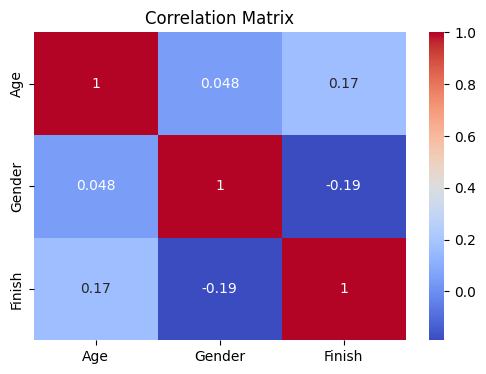

In [8]:
# Correlation heatmap

corr = df[['Age', 'Gender', 'Finish']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Selection & Data Split

In [9]:
# Prepare Features and Target

# Features and target
X = df[['Age', 'Gender', 'Race']]
y = df['Finish']

In [13]:
# One-hot encode the 'Race' column
X = pd.get_dummies(X, columns=['Race'], drop_first=True)

In [15]:
# Split into Train and Test Sets using an 80/20 rule

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (336136, 614)
Test set: (84035, 614)


In [16]:
# Sanity check

print(X_train.isnull().sum().sum(), X_test.isnull().sum().sum())

0 0


# Linear Regression Model Training & Evaluation

In [17]:
# Initialise and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f} seconds")
print(f"Root Mean Squared Error: {rmse:.2f} seconds")

R² Score: 0.3588
Mean Absolute Error: 2673.62 seconds
Root Mean Squared Error: 3391.50 seconds


<Axes: xlabel='Age', ylabel='Finish'>

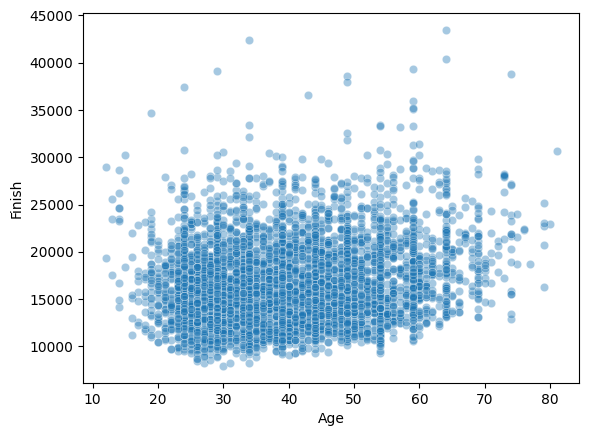

In [19]:
df_sample = df.sample(5000, random_state=42)
sns.scatterplot(x='Age', y='Finish', data=df_sample, alpha=0.4)


In [20]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values(key=abs, ascending=False).head(10)


Race_Outlaw 100                                  10224.498675
Race_Tulsa Urban Adventure Race Marathon         10135.590052
Race_Center of the Nation Marathon - Colorado    10037.521646
Race_Alaska Series - Day 4                        9723.624422
Race_Summer Camp Series - Day 5                   9618.267681
Race_Pikes Peak Marathon                          9488.857226
Race_Alaska Series - Day 2                        9201.220857
Race_Diablo Trail Marathon                        9138.381226
Race_Labor Day Triple, Day 3                      9115.192412
Race_Summer Camp Series - Day 1                   9070.791240
dtype: float64